In [1]:
import _init_paths
from glob import glob
import cv2
import numpy as np
import pandas as pd

import torch.utils.data as data

In [2]:
from datasets.dataset.coco import COCO
from datasets.dataset_factory import get_dataset

In [3]:
from opts import opts
opt = opts()
opt.input_res = 0
opt.input_h = 640
opt.input_w = 640
opt.down_ratio = 4
opt.task = 'ctdet'
opt.cat_spec_wh = False
opt.reg_offset = True
opt.data_dir = '../data'
opt.keep_res = False
opt.not_rand_crop = False
opt.flip = True
opt.no_color_aug = False
opt.mse_loss = False
opt.heatmap_wh = True
opt.dense_wh = False
opt.large_scale = False

opt.not_rand_crop = True
opt.scale = 0.4
opt.shift = 0.1
opt.rotate = 90

opt.mosaic = True
opt.debug = True

In [4]:
Dataset = get_dataset('wheat', opt.task)
opt = opts().update_dataset_info_and_set_heads(opt, Dataset)

heads {'hm': 1, 'wh': 2, 'reg': 2}


In [5]:
ds = Dataset(opt, 'train')

==> initializing coco 2017 train data.
loading annotations into memory...
Done (t=0.59s)
creating index...
index created!
==> initializing data dictionary...
Loaded train 2698 samples


In [21]:
len(ds)

2698

In [ ]:
o.keys()

In [ ]:
o['meta']['path']

In [ ]:
ds.mean
ds.std

In [22]:
ds.data_dict[]

{'file_name': 'ffdf83e42.jpg',
 'height': 1024,
 'width': 1024,
 'id': 20200003372,
 'annotations': [{'segmentation': [[306.0,
     178.0,
     306.0,
     266.0,
     373.0,
     266.0,
     373.0,
     178.0]],
   'area': 5896.0,
   'iscrowd': 0,
   'image_id': 20200003372,
   'bbox': [306.0, 178.0, 67.0, 88.0],
   'category_id': 0,
   'id': 147754},
  {'segmentation': [[367.0, 167.0, 367.0, 224.0, 430.0, 224.0, 430.0, 167.0]],
   'area': 3591.0,
   'iscrowd': 0,
   'image_id': 20200003372,
   'bbox': [367.0, 167.0, 63.0, 57.0],
   'category_id': 0,
   'id': 147755},
  {'segmentation': [[72.0, 238.0, 72.0, 312.0, 229.0, 312.0, 229.0, 238.0]],
   'area': 11618.0,
   'iscrowd': 0,
   'image_id': 20200003372,
   'bbox': [72.0, 238.0, 157.0, 74.0],
   'category_id': 0,
   'id': 147756},
  {'segmentation': [[0.0, 249.0, 0.0, 348.0, 120.0, 348.0, 120.0, 249.0]],
   'area': 11880.0,
   'iscrowd': 0,
   'image_id': 20200003372,
   'bbox': [0.0, 249.0, 120.0, 99.0],
   'category_id': 0,
   'i

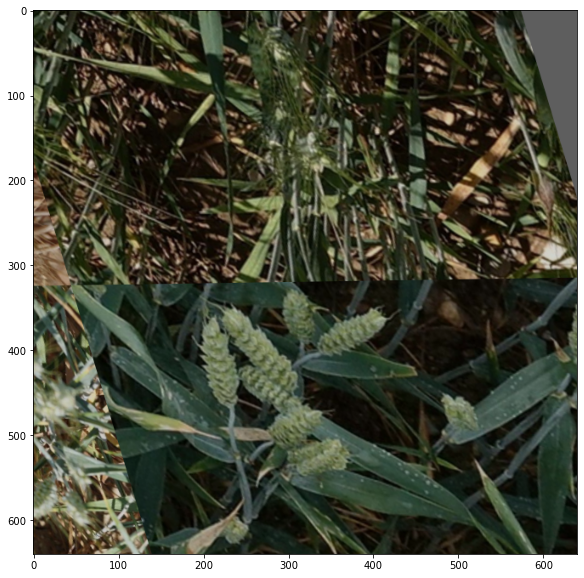

In [23]:
o = ds[-1]
reverse = (((o['input'].transpose(1, 2, 0) * ds.std) + ds.mean) * 255).astype(np.uint8)
reverse =  cv2.cvtColor(reverse, cv2.COLOR_BGR2RGB)

%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(reverse)
plt.show()

In [27]:
from lib.utils.utils import collate
import torch

train_loader = torch.utils.data.DataLoader(
  Dataset(opt, 'train'), 
  batch_size=8,
  collate_fn= collate,
  shuffle=True,
  drop_last=True
)

==> initializing coco 2017 train data.
loading annotations into memory...
Done (t=0.74s)
creating index...
index created!
==> initializing data dictionary...
Loaded train 2698 samples


In [28]:
for i in train_loader:
    breal

RuntimeError: stack expects each tensor to be equal size, but got [12, 6] at entry 0 and [40, 6] at entry 1

In [19]:
o['input'].shape

(3, 640, 640)

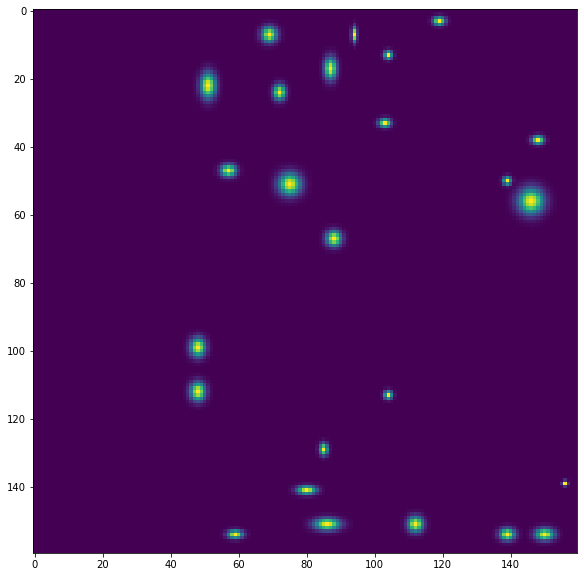

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(o['hm'][0])
plt.show()

In [ ]:
bboxes = o['meta']['gt_det'][:, :4].astype(np.uint8)

In [ ]:
from PIL import Image
import matplotlib.patches as patches

fig, axs = plt.subplots(1, 1, figsize=(10,10))
op = Image.fromarray(reverse)
axs.imshow(o['hm'][0])
for bbox in bboxes:
    rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)
plt.show()